# Problem Statement:

## About Company

**Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.**

----------------------------------------------------------------

### Business Need

*Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.*

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data

data = pd.read_csv('/content/drive/MyDrive/Automatic Loan Prediction System/train_ctrUa4K.csv')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Dropping an irrelevant column

data.drop('Loan_ID', axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 1. Exploratory Data Analysis

In [ ]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Let's first check the class distribution

data['Loan_Status'].value_counts().values

array([422, 192])

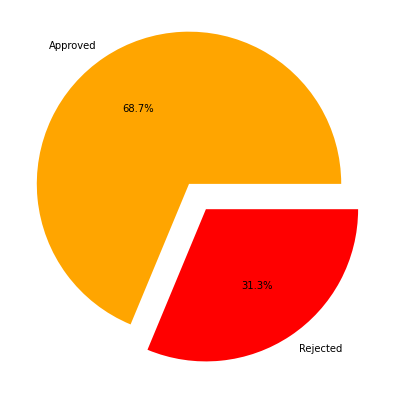

In [ ]:
# Let's create a Pie-Chart to graphically represent the class distribution

plt.figure(figsize=(13, 7))

labels = ['Approved', 'Rejected']
explode = [.1, .1]
mycolors = ['Orange', 'Red']
sizes = data['Loan_Status'].value_counts().values

plt.pie(sizes, explode=explode,labels=labels, colors=mycolors, autopct="%1.1f%%")
plt.show()

*From the above chart, we can observed that 69% of the applications has been approved where as 31% of the applicationsare rejected which indicates 2/3rd of applicants has been granted loan in a given dataset.*

### Let's analyze the numerical data

In [ ]:
data_num = data.select_dtypes(include=np.number)
data_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [ ]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
data_num.drop(['Loan_Amount_Term', 'Credit_History'], axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
data_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


In [ ]:
data_num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


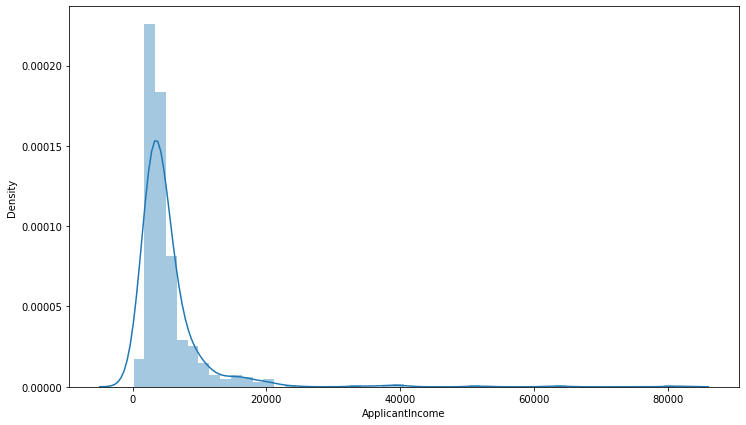

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


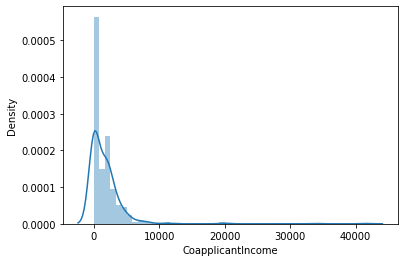

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


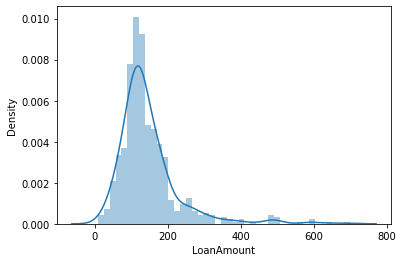

In [ ]:
plt.figure(figsize=(12, 7))

for i in data_num.columns:
  sns.distplot(data_num[i])
  plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


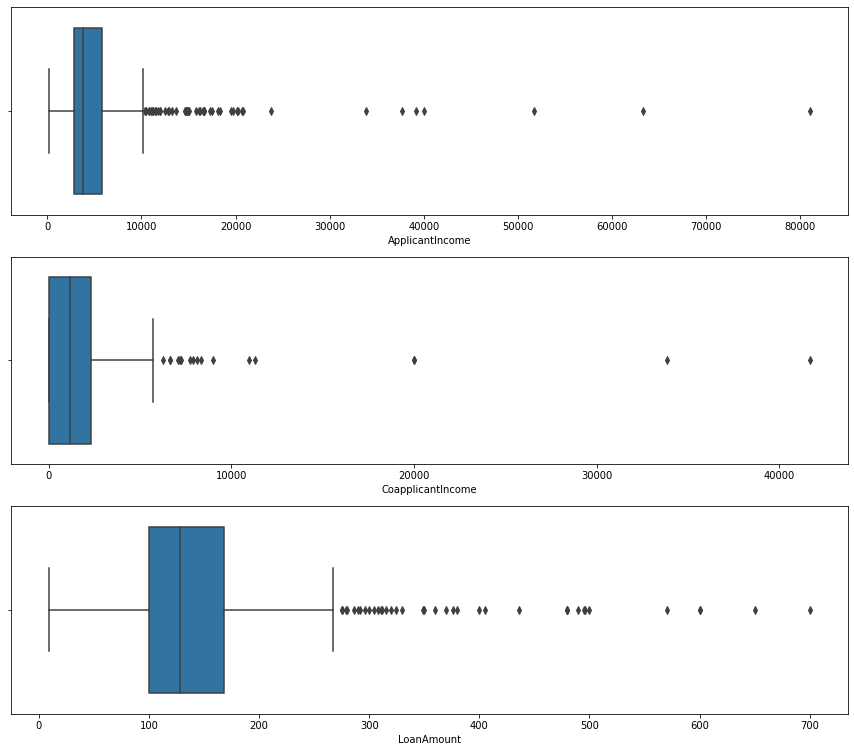

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(15, 13))

plt1 = sns.boxplot(data['ApplicantIncome'], ax = axs[0])
plt1 = sns.boxplot(data['CoapplicantIncome'], ax = axs[1])
plt1 = sns.boxplot(data['LoanAmount'], ax = axs[2])

plt.show()

#### Insights

1. None of the numerical data is normally distributed.
2. Every numerical data contains an outlier.

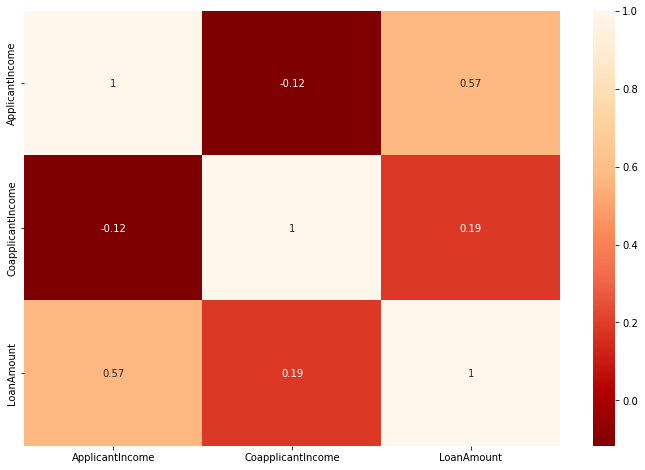

In [ ]:
# Analyze the relation between the variables using Correlation Matrix / Heatmap

plt.figure(figsize=(12, 8))
cor = data_num.corr()
sns.heatmap(cor, annot=True, cmap = 'OrRd_r')
plt.show()

### Analyze the Categorical Data

In [ ]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

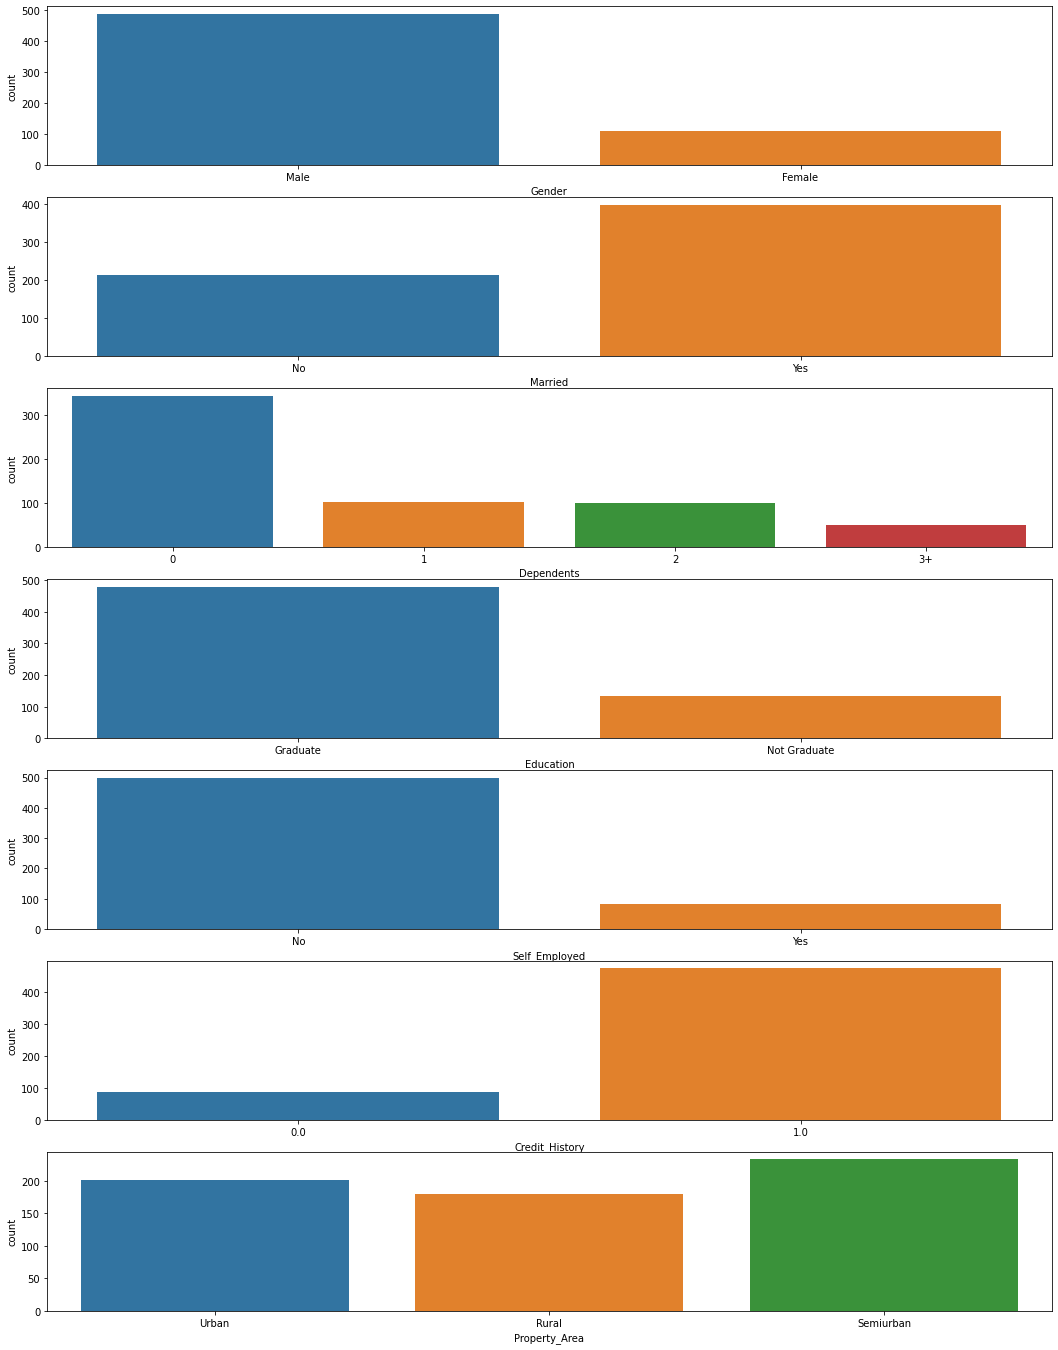

In [ ]:
fig, ax = plt.subplots(nrows = 7, ncols=1, figsize = (18, 24))

cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

for i, val in enumerate(cols):
  sns.countplot(x = val, data = data, ax=ax[i])

In [ ]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

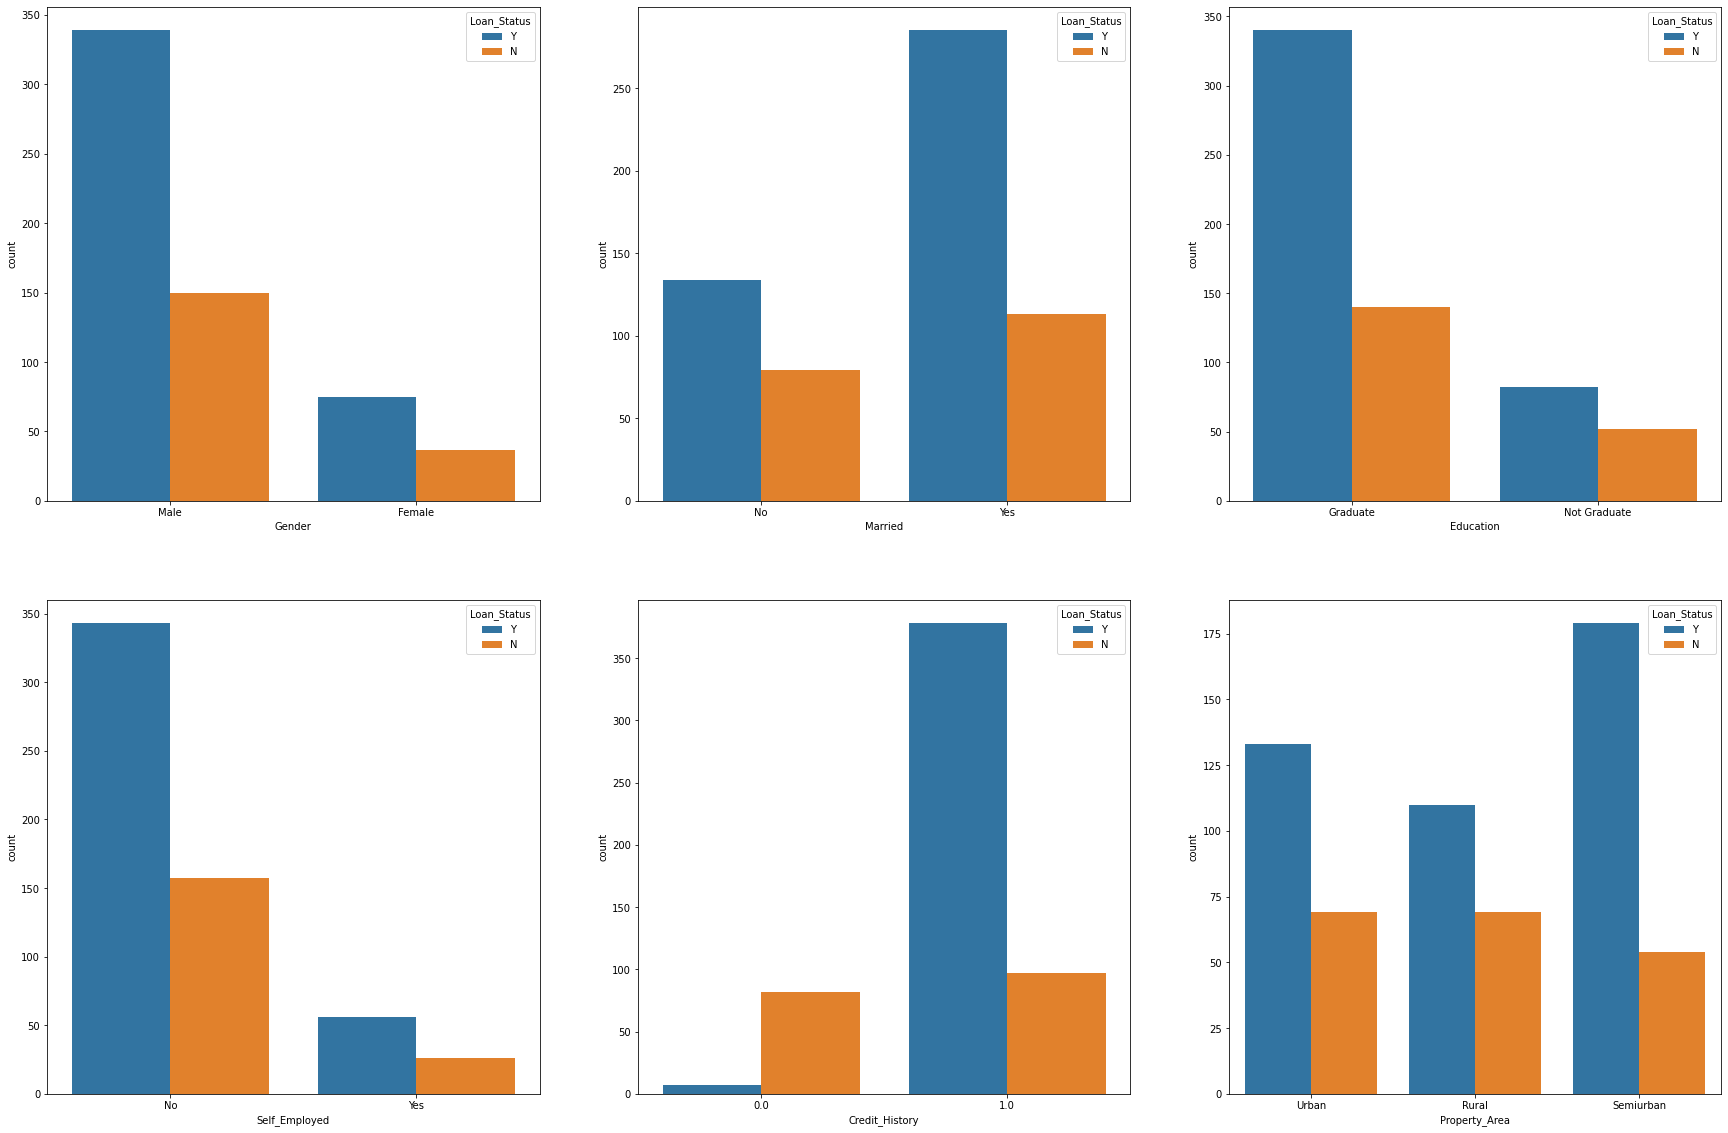

In [ ]:
# Let's analyze the relation between input and target variable

fig, ax = plt.subplots(2,3, figsize = (30, 20))

sns.countplot(x = 'Gender', hue = 'Loan_Status', data = data, ax = ax[0][0])
sns.countplot(x = 'Married', hue = 'Loan_Status', data = data, ax = ax[0][1])
sns.countplot(x = 'Education', hue = 'Loan_Status', data = data, ax = ax[0][2])
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = data, ax = ax[1][0])
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = data, ax = ax[1][1])
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = data, ax = ax[1][2])

plt.show()

## 2. Feature Engineering

In [ ]:
# Handling Missing Values

data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data['Gender'].mode()[0]

'Male'

In [ ]:
# Let's impute the missing values with statistical data

data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)


data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)

In [ ]:
data.isnull().sum().sum()

0

#### (ii) Handling Categorical Data

In [ ]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
for i in cols:
  data[i] = le.fit_transform(data[i])


In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


#### (iii) Handling Outliers

In [ ]:
Q1 = data['ApplicantIncome'].quantile(0.25)
Q3 = data['ApplicantIncome'].quantile(0.75)

Q3, Q1

(5795.0, 2877.5)

In [ ]:
IQR = Q3 - Q1
IQR

2917.5

In [ ]:
ub = Q3 + 3*IQR
ub

14547.5

In [ ]:
# Outlier Detection For Applicant Income

Q1 = data['ApplicantIncome'].quantile(0.25)
Q3 = data['ApplicantIncome'].quantile(0.75)

IQR = Q3 - Q1
data = data[(data['ApplicantIncome'] >= Q1 - 3*IQR) & (data['ApplicantIncome'] <= Q3 + 3*IQR)]

In [ ]:
# Outlier Detection For Co-Applicant Income

Q1 = data['CoapplicantIncome'].quantile(0.25)
Q3 = data['CoapplicantIncome'].quantile(0.75)

IQR = Q3 - Q1
data = data[(data['CoapplicantIncome'] >= Q1 - 3*IQR) & (data['CoapplicantIncome'] <= Q3 + 3*IQR)]

In [ ]:
# Outlier Detection For Loan Amount

Q1 = data['LoanAmount'].quantile(0.25)
Q3 = data['LoanAmount'].quantile(0.75)

IQR = Q3 - Q1
data = data[(data['LoanAmount'] >= Q1 - 3*IQR) & (data['LoanAmount'] <= Q3 + 3*IQR)]

In [ ]:
Q1 + 3*IQR

280.0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


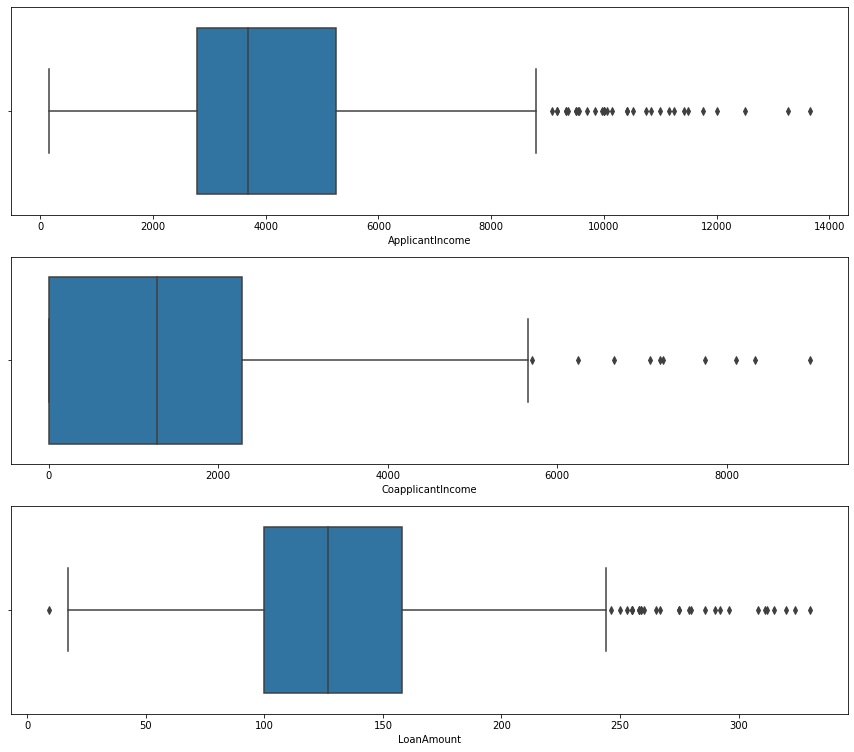

In [ ]:
## Let's visualize the graph after outlier treatment

fig, axs = plt.subplots(3,1, figsize=(15, 13))

plt1 = sns.boxplot(data['ApplicantIncome'], ax = axs[0])
plt1 = sns.boxplot(data['CoapplicantIncome'], ax = axs[1])
plt1 = sns.boxplot(data['LoanAmount'], ax = axs[2])

plt.show()

#### Feature Selection using Chi-Square Test

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Split the input and target varaibles

x1 = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y1 = data['Loan_Status']

In [ ]:
# return the chi2 value

score = chi2(x1, y1)

In [ ]:
score

(array([ 0.11954126,  1.72779232,  0.1034337 ,  4.35000265,  0.3473718 ,
         2.77491401, 25.18454835,  0.29571963]),
 array([7.29532559e-01, 1.88693084e-01, 7.47747338e-01, 3.70088886e-02,
        5.55604671e-01, 9.57517988e-02, 5.20979354e-07, 5.86578355e-01]))

### Chi-Square (Test for Independence)

- Null Hypothesis: Variables are independent on each other. 
- Alternate Hypotheis: Variables are dependent on each other.

***If p-value is <= 0.05, then we can reject the null hypothesis or else we should accept the null hypothesis.***

In [ ]:
score[1]

array([7.29532559e-01, 1.88693084e-01, 7.47747338e-01, 3.70088886e-02,
       5.55604671e-01, 9.57517988e-02, 5.20979354e-07, 5.86578355e-01])

In [ ]:
p_values = pd.Series(score[1], index = x1.columns)

In [ ]:
p_values

Gender              7.295326e-01
Married             1.886931e-01
Dependents          7.477473e-01
Education           3.700889e-02
Self_Employed       5.556047e-01
Loan_Amount_Term    9.575180e-02
Credit_History      5.209794e-07
Property_Area       5.865784e-01
dtype: float64

In [ ]:
irr_cols = []

for x in p_values.index:
  if p_values[x] <= 0.05:
    print(x, ' :- Reject the Null Hypothesis')
  else:
    print(x, ' :- Accept the Null Hypothesis')
    irr_cols.append(x)

Gender  :- Accept the Null Hypothesis
Married  :- Accept the Null Hypothesis
Dependents  :- Accept the Null Hypothesis
Education  :- Reject the Null Hypothesis
Self_Employed  :- Accept the Null Hypothesis
Loan_Amount_Term  :- Accept the Null Hypothesis
Credit_History  :- Reject the Null Hypothesis
Property_Area  :- Accept the Null Hypothesis


In [ ]:
irr_cols

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'Loan_Amount_Term',
 'Property_Area']

In [ ]:
# drop all the irrelevant features as they are adding any value to my model

data.drop(labels = irr_cols, axis =1, inplace = True)

In [ ]:
data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,5849,0.0,128.0,1,1
1,0,4583,1508.0,128.0,1,0
2,0,3000,0.0,66.0,1,1
3,1,2583,2358.0,120.0,1,1
4,0,6000,0.0,141.0,1,1


In [ ]:
## Data Splitting

X = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [ ]:
X_train.shape, X_test.shape

((456, 5), (115, 5))

## 3. Model Building

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 3, min_samples_leaf=35)

In [ ]:
# Fit the data on Decision Tree Classifier

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)

## 4. Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, recall_score, precision_score

In [ ]:
# Making Prediction on test data

pred = dt.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.7913043478260869

In [ ]:
f1_score(y_test, pred)

0.8554216867469879

In [ ]:
confusion_matrix(y_test, pred)

array([[20, 24],
       [ 0, 71]])

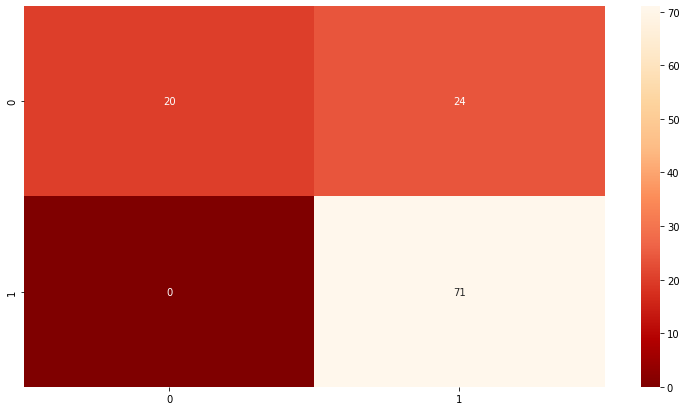

In [ ]:
plt.figure(figsize=(13, 7))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True, cmap = 'OrRd_r')
plt.show()

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.45      0.62        44
           1       0.75      1.00      0.86        71

    accuracy                           0.79       115
   macro avg       0.87      0.73      0.74       115
weighted avg       0.84      0.79      0.77       115



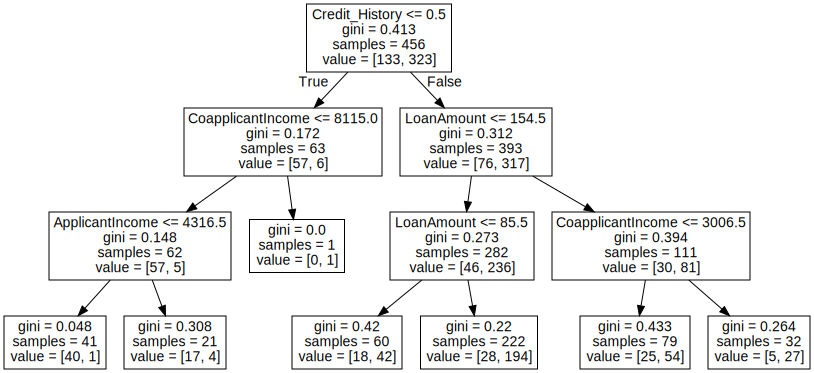

In [ ]:
# Visulazing Decision Tree with Max Depth = 3

import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

In [ ]:
# saving the model 
import pickle 
pickle_out = open("/content/drive/MyDrive/Full Stack Data Science with Python - Real Time Case Studies (MSME PPDC Chennai)/Case Study: Loan Automation System using Decision Tree/Automating_Loan_Prediction_System.pkl", mode = "wb") 
pickle.dump(dt, pickle_out) 
pickle_out.close()